# Import modules

In [2]:
#!/usr/bin/pythonpy
################################################################################
# PYTHON's MODULAE
# ------------------------------------------------------------------------------
################################################################################
import os
import sys
module_path = os.path.abspath(os.path.join('/lib/python3.8/site-packages'))
if module_path not in sys.path:
    sys.path.append(module_path)

import fortran_integral
import fortran_quad
import numpy as np
from numpy import sqrt as sqrt
from numpy import pi as pi

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.colorbar as colorb
import pickle 
import datetime
from matplotlib import colors

# Total cross sections
# Total cross sections
sys.path.append('../app/')
if module_path not in sys.path:
    sys.path.append(module_path)
import models.sigma0_xsections as sig0
import models.general_parameters as gp
import models.relic_density_calc as ohm
import models.radiative_factorization as hp
import models.pdf_integration as qcd
import utils.colorb_2D as cb2d
import lhapdf  


#################################################
today = datetime.date.today().strftime('%Y-%m-%d')
today = '2024-01-02'

## Some configurations

Mmed = gp.Mmed
mx = gp.mx
Nf_x = gp.Nf_ee

---
---

# New 1D Plots - coupling and decay scenario investigations

## decays

/tmp/ipykernel_565/1842807761.py:93: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


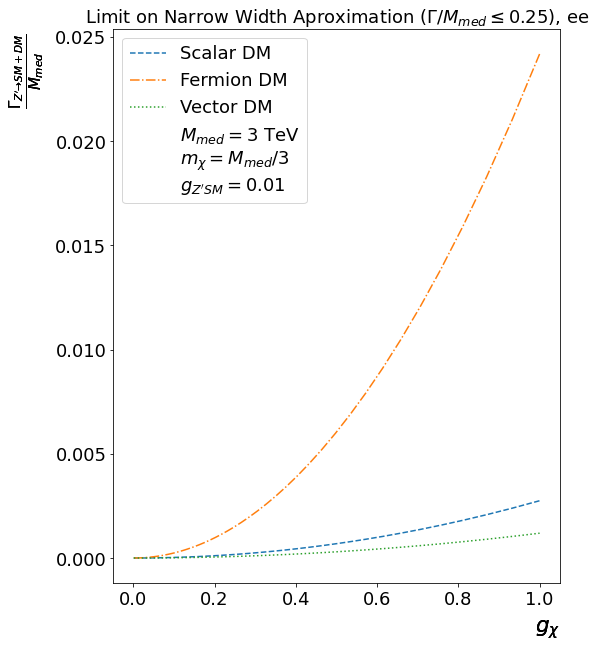

In [41]:
###########################     PARAMETERS     ##################################
binsize = 100
process = 'ee'
gr = gl = gp.gr0_e if process == 'ee' else gp.gr0_q # variação do valor do acoplamento direito
gx = gp.gx0 # variação do valor do acoplamento escuro´

gx_arr = np.geomspace(1E-3, 1, binsize) # DM coupling

Mmed = 3  ## Mediator mass [TeV]
mx = Mmed / 3 # DM mass [TeV]
mq = gp.me ## electron mass 

Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq

################################################################################
fsize = 18
# Set up figure and image grid
sigmazqqISR = {}
sighat_hphoton = {}
sigmazqqNOISR = {}
sigmazeeNOISR = {}
sigmazeeISR = {}
sighat_hphoton_xg = {}
sig0qq = {}


fig = plt.figure(figsize=(8, 10))

ax = ImageGrid(fig, 111,          # as in plt.subplot(111)
                nrows_ncols=(1,1),
                axes_pad=(0.45, 0.0),
                share_all=True,
                #cbar_location="right",
                #cbar_mode="single",
                #cbar_size="5%",aq
                #cbar_pad=0.10,
                aspect=False
                )
mdict = {'Scalar':'--', 'Fermion':'-.', 'Vector':':'}
for fignumber, dmname in enumerate(sig0.dmnames):
    fignumber = 0

    # Ratio: gamma / Mmed


    decay_sum = sig0.GM(dmname).GMdecay(Mmed**2, mq, Mmed, mx, gr, gr, gx_arr, Nf_x) + sig0.GM('SM').GMdecay(Mmed**2, mq, Mmed, mx, gr, gr, gx_arr, Nf_x)
    ratioNWA = decay_sum / Mmed
    
    ax[fignumber].plot(gx_arr, ratioNWA, linestyle=mdict[dmname] , linewidth=1.5, label=f'{dmname} DM')
    

    
    ## Plot Labels ##
    fig.set_dpi(72)
    #ax[fignumber].set_yscale('log')
    ax[fignumber].set_title(rf'Limit on Narrow Width Aproximation ($\Gamma / M_{{med}} \leq  0.25$), {process}', fontsize = fsize)
    ax[fignumber].tick_params(axis="x", labelsize=fsize)
    ax[0].tick_params(axis="y", labelsize=fsize)
    # More labels
    # More labels


    # plot legend
    #LEG =  ax[2].legend(loc='upper right', fontsize = fsize-5.5)
    
    ## TEXT BELLOW THE LABELS ##
    #get the extent of the largest box containing all the axes/subplots
#if fignumber == 2:
    extents = np.array([a.get_position().extents for a in ax])  #all axes extents
    bigextents = np.empty(4)   
    bigextents[:2] = extents[:,:2].min(axis=0)
    bigextents[2:] = extents[:,2:].max(axis=0)

    #text to mimic the x and y label. The text is positioned in the middle 
    labelpad=0.02  #distance between the external axis and the text
    xlab_t = fig.text(bigextents[2], bigextents[1]-0.08,r'$ g_{\chi}$',
        horizontalalignment='right', verticalalignment = 'bottom', size = fsize+3.5)
    ylab_t = fig.text( bigextents[0]-0.15, bigextents[0]*7,r"""$\frac{\Gamma_{Z'\to SM+DM}}{M_{med}}$""",
        rotation='vertical', horizontalalignment = 'center', verticalalignment = 'top', size = fsize+3.5)

#if fignumber == 2:
textstr = fr"""$M_{{med}} = 3$ TeV
$m_\chi = M_{{med}} /3$
$g_{{Z'SM}} = {gr} $"""



ax[0].plot([], [], label=textstr, color = 'None')   
fig.set_dpi(72)
fig.savefig(f'../figures/{today}-NWA-decay-scenarios_gx_{process}.pdf', dpi=72, bbox_inches = "tight")

ax[0].legend(loc='upper left', fontsize = fsize)
fig.show()
################################################################################

/tmp/ipykernel_565/2815490841.py:95: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


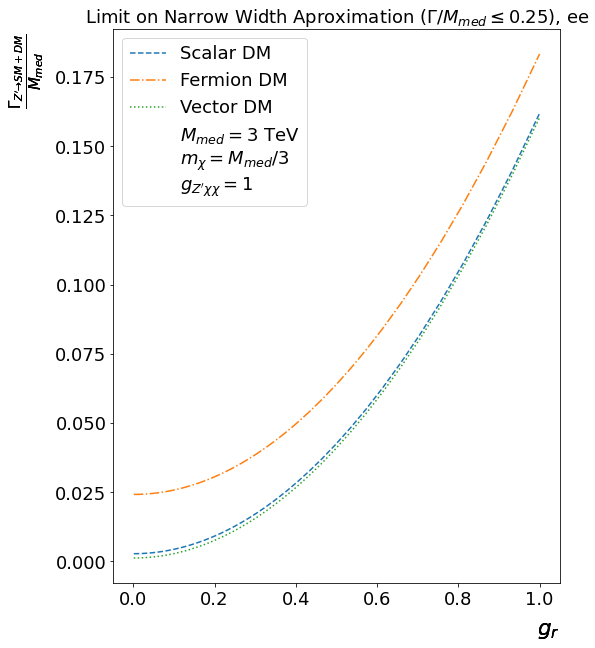

In [40]:
###########################     PARAMETERS     ##################################
binsize = 100

process = 'ee'
gr = gl = gp.gr0_e if process == 'ee' else gp.gr0_q # variação do valor do acoplamento direito
gx = 1 #$ gp.gx0 # variação do valor do acoplamento escuro´

gr_arr = np.geomspace(1E-3, 1, binsize) # DM coupling

Mmed = 3  ## Mediator mass [TeV]
mx = Mmed / 3 # DM mass [TeV]
mq = gp.me ## electron mass 


Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq

################################################################################
fsize = 18
# Set up figure and image grid
sigmazqqISR = {}
sighat_hphoton = {}
sigmazqqNOISR = {}
sigmazeeNOISR = {}
sigmazeeISR = {}
sighat_hphoton_xg = {}
sig0qq = {}


fig = plt.figure(figsize=(8, 10))

ax = ImageGrid(fig, 111,          # as in plt.subplot(111)
                nrows_ncols=(1,1),
                axes_pad=(0.45, 0.0),
                share_all=True,
                #cbar_location="right",
                #cbar_mode="single",
                #cbar_size="5%",aq
                #cbar_pad=0.10,
                aspect=False
                )
mdict = {'Scalar':'--', 'Fermion':'-.', 'Vector':':'}
for fignumber, dmname in enumerate(sig0.dmnames):
    fignumber = 0

    # Ratio: gamma / Mmed


    decay_sum = sig0.GM(dmname).GMdecay(Mmed**2, mq, Mmed, mx, gr_arr, gr_arr, gx, Nf_x) + sig0.GM('SM').GMdecay(Mmed**2, mq, Mmed, mx, gr_arr, gr_arr, gx, Nf_x)
    ratioNWA = decay_sum / Mmed
    
    ax[fignumber].plot(gx_arr, ratioNWA, linestyle=mdict[dmname] , linewidth=1.5, label=f'{dmname} DM')
    

    
    ## Plot Labels ##
    fig.set_dpi(72)
    #ax[fignumber].set_yscale('log')
    ax[fignumber].set_title(rf'Limit on Narrow Width Aproximation ($\Gamma / M_{{med}} \leq  0.25$), {process}', fontsize = fsize)
    ax[fignumber].tick_params(axis="x", labelsize=fsize)
    ax[0].tick_params(axis="y", labelsize=fsize)
    # More labels
    # More labels


    # plot legend
    #LEG =  ax[2].legend(loc='upper right', fontsize = fsize-5.5)
    
    ## TEXT BELLOW THE LABELS ##
    #get the extent of the largest box containing all the axes/subplots
#if fignumber == 2:
    extents = np.array([a.get_position().extents for a in ax])  #all axes extents
    bigextents = np.empty(4)   
    bigextents[:2] = extents[:,:2].min(axis=0)
    bigextents[2:] = extents[:,2:].max(axis=0)

    #text to mimic the x and y label. The text is positioned in the middle 
    labelpad=0.02  #distance between the external axis and the text
    xlab_t = fig.text(bigextents[2], bigextents[1]-0.08,r'$ g_r$',
        horizontalalignment='right', verticalalignment = 'bottom', size = fsize+3.5)
    ylab_t = fig.text( bigextents[0]-0.15, bigextents[0]*7,r"""$\frac{\Gamma_{Z'\to SM+DM}}{M_{med}}$""",
        rotation='vertical', horizontalalignment = 'center', verticalalignment = 'top', size = fsize+3.5)

#if fignumber == 2:
textstr = fr"""$M_{{med}} = 3$ TeV
$m_\chi = M_{{med}} /3$
$g_{{Z'\chi \chi }} = {gx} $"""



ax[0].plot([], [], label=textstr, color = 'None')   
fig.set_dpi(72)
fig.savefig(f'../figures/{today}-NWA-decay-scenarios_gx_{process}.pdf', dpi=72, bbox_inches = "tight")

ax[0].legend(loc='upper left', fontsize = fsize)
fig.show()
################################################################################

---
## CMS Scenario

/tmp/ipykernel_565/116228861.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


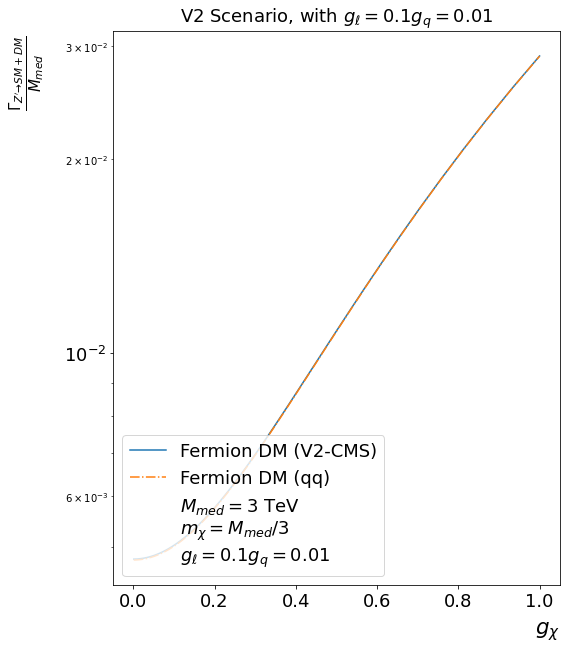

In [58]:
###########################     PARAMETERS     ##################################
binsize = 100
process = 'ee'
gr = gl = gp.gr0_e if process == 'ee' else gp.gr0_q # variação do valor do acoplamento direito
gx = gp.gx0 # variação do valor do acoplamento escuro´

gx_arr = np.geomspace(1E-3, 1, binsize) # DM coupling

Mmed = 3  ## Mediator mass [TeV]
mx = Mmed / 3 # DM mass [TeV]
mq = gp.me ## electron mass 

Nf_x = gp.Nf_ee if process == 'ee' else gp.Nf_qq

################################################################################
fsize = 18
# Set up figure and image grid
sigmazqqISR = {}
sighat_hphoton = {}
sigmazqqNOISR = {}
sigmazeeNOISR = {}
sigmazeeISR = {}
sighat_hphoton_xg = {}
sig0qq = {}


fig = plt.figure(figsize=(8, 10))

ax = ImageGrid(fig, 111,          # as in plt.subplot(111)
                nrows_ncols=(1,1),
                axes_pad=(0.45, 0.0),
                share_all=True,
                #cbar_location="right",
                #cbar_mode="single",
                #cbar_size="5%",aq
                #cbar_pad=0.10,
                aspect=False
                )
mdict = {'Scalar':'--', 'Fermion':'-.', 'Vector':':'}
for fignumber, dmname in enumerate(['Fermion']):
    fignumber = 0

    # Ratio: gamma / Mmed

    # DM + LEPTONS + QUARKS
    decay_sum = sig0.GM(dmname).GMdecay(Mmed**2, mq, Mmed, mx, gr, gr, gx_arr, Nf_x ) +  sig0.GM('SM').GMdecay(Mmed**2, mq, Mmed, mx, 0.01, 0.01, gx_arr, 6) + sig0.GM('SM').GMdecay(Mmed**2, mq, Mmed, mx, 0.1, 0.1, gx_arr, 18)
    ratioNWA = decay_sum / Mmed
    
    ax[fignumber].plot(gx_arr, ratioNWA, linestyle='-' , linewidth=1.5, label=f'{dmname} DM (V2-CMS)')
    
    decay_sum = sig0.GM(dmname).GMdecay(Mmed**2, mq, Mmed, mx, 0.01, 0.01, gx_arr, 6) + sig0.GM('SM').GMdecay(Mmed**2, mq, Mmed, mx, 0.01, 0.01, gx_arr, 6)
    ratioNWA = decay_sum / Mmed
    
    #ax[fignumber].plot(gx_arr, ratioNWA, linestyle='--' , linewidth=1.5, label=f'{dmname} DM (ee)')


    decay_sum = sig0.GM(dmname).GMdecay(Mmed**2, mq, Mmed, mx, 0.1, 0.1, gx_arr, Nf_x) + sig0.GM('SM').GMdecay(Mmed**2, mq, Mmed, mx, 0.1, 0.1, gx_arr, 18)
    ratioNWA = decay_sum / Mmed
    
    ax[fignumber].plot(gx_arr, ratioNWA, linestyle='-.' , linewidth=1.5, label=f'{dmname} DM (qq)')
    
    ## Plot Labels ##
    fig.set_dpi(72)
    #ax[fignumber].set_yscale('log')
    ax[fignumber].set_title(rf'V2 Scenario, with $g_\ell = 0.1g_q = 0.01$', fontsize = fsize)
    ax[fignumber].tick_params(axis="x", labelsize=fsize)
    ax[0].tick_params(axis="y", labelsize=fsize)
    
    # More labels
    # More labels


    # plot legend
    #LEG =  ax[2].legend(loc='upper right', fontsize = fsize-5.5)
    
    ## TEXT BELLOW THE LABELS ##
    #get the extent of the largest box containing all the axes/subplots
#if fignumber == 2:
    extents = np.array([a.get_position().extents for a in ax])  #all axes extents
    bigextents = np.empty(4)   
    bigextents[:2] = extents[:,:2].min(axis=0)
    bigextents[2:] = extents[:,2:].max(axis=0)

    #text to mimic the x and y label. The text is positioned in the middle 
    labelpad=0.02  #distance between the external axis and the text
    xlab_t = fig.text(bigextents[2], bigextents[1]-0.08,r'$ g_{\chi}$',
        horizontalalignment='right', verticalalignment = 'bottom', size = fsize+3.5)
    ylab_t = fig.text( bigextents[0]-0.15, bigextents[0]*7,r"""$\frac{\Gamma_{Z'\to SM+DM}}{M_{med}}$""",
        rotation='vertical', horizontalalignment = 'center', verticalalignment = 'top', size = fsize+3.5)

#if fignumber == 2:
textstr = fr"""$M_{{med}} = 3$ TeV
$m_\chi = M_{{med}} /3$
$g_\ell = 0.1g_q = 0.01$"""



ax[0].plot([], [], label=textstr, color = 'None')   
ax[0].set_yscale('log')
fig.set_dpi(72)
fig.savefig(f'../figures/{today}-NWA-decay-scenarios_gx_{process}_V2scenario.pdf', dpi=600, bbox_inches = "tight")

ax[0].legend(loc='lower left', fontsize = fsize)
fig.show()
################################################################################